<a href="https://colab.research.google.com/github/tlyonsSETU/Applied-Calculus/blob/main/Python_Workbook_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name:
### Student Number:

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
import matplotlib.style as style # Change the plot style used for graphs
style.use('seaborn')

In [3]:
# The following libraries are for creating interactive plots
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [4]:
import sympy as sym

# Python Workbook 5 - Limits & Differentiation

* In this workbook we will cover the following topics:
  1. Limits of functions

  2. Piecewise functions and their derivatives

  3. Continuity and smoothness of functions

---
---

# Defining a sequence

* A sequence of numbers is just a list of numbers that follow a particular pattern

* As an example, the numbers
$$
1, 5, 25, 125, 625,...
$$
can all be written as powers of $5$ according to
$$
5^0, 5^1, 5^2, 5^3, 5^4,...
$$

* We usually write this as the sequence 
$$
S = \{5^n\}_{n\in \mathbb{N}},
$$
where $S$ is our sequence of numbers, $5^{n}$ tells us how to calculate the $n^{\mathrm{th}}$ element of this sequence, and $n\in\mathbb{N}$ means the __index__ $n$ is in the __Natural Numbers__ $\mathbb{N} = 0, 1, 2,3,4,...$ 

## Sequences of small numbers

* In most of the following, we will want to caculate functions along sequences of small numbers, or numbers getting very close to a specific value.

* For this reason, we are going to define a function that will automatically generate a finite seqnuce of __decreasing__ values as follows: 


In [40]:
def S(N):
  return 1/10**(np.linspace(0,N,N+1))

* This creates a list of numbers of the form
$$
S=\left\{\frac{1}{10^0},\frac{1}{10^1},\frac{1}{10^2},\frac{1}{10^3},\ldots,\frac{1}{10^N}\right\} = \{1,0.1,0.01,0.001,...,\underbrace{0.0...0}_{N-\text{times}}1\}
$$

* As you can see, this is a list of numbers that is getting smaller as $N$ gets bigger.

* We say that 
$$
\lim_{N\to \infty}\frac{1}{10^{N}} = 0,
$$
i.e. as $N$ grows bigger, the number $\frac{1}{10^N}$ becomes smaller.


* We will check this with a few examples below:

In [41]:
S(1)

array([1. , 0.1])

In [42]:
S(3)

array([1.   , 0.1  , 0.01 , 0.001])

In [43]:
S(5)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05])

In [44]:
S(25)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09, 1.e-10, 1.e-11, 1.e-12, 1.e-13, 1.e-14, 1.e-15,
       1.e-16, 1.e-17, 1.e-18, 1.e-19, 1.e-20, 1.e-21, 1.e-22, 1.e-23,
       1.e-24, 1.e-25])

---
---

# __Section 1.1__ Limits of functions


## __Example 1__ 
* When we write a limit like
$$
\lim_{x\to 5} (x^2-4)
$$
what we mean is calculate the output of the function $x^2-4$ as the input $x$ gets closer and closer to 5.


* We can easily calculate this limit now using our sequnce function above:

1. First we define a corresponding python function:

In [45]:
def f(x):
  return x**2-4

2. Now we create a squence of number that approaces $x=5$ from below and from above as follows 

In [69]:
L5=5-S(8)
L5

array([4.        , 4.9       , 4.99      , 4.999     , 4.9999    ,
       4.99999   , 4.999999  , 4.9999999 , 4.99999999])

In [70]:
R5=5+S(8)
R5

array([6.        , 5.1       , 5.01      , 5.001     , 5.0001    ,
       5.00001   , 5.000001  , 5.0000001 , 5.00000001])

* As we can see, both of these squences approach 5. 

* The sequence __L5__ approches $5$ from the __Left__ (or from below), while the seuqnce __R5__ approaches $5$ from the __Right__ (or from above).

* Now we can sub both seuqnces into the function __f(x)__ and see what output we get in each case:

In [71]:
f(L5)

array([12.        , 20.01      , 20.9001    , 20.990001  , 20.99900001,
       20.9999    , 20.99999   , 20.999999  , 20.9999999 ])

In [72]:
f(R5)

array([32.        , 22.01      , 21.1001    , 21.010001  , 21.00100001,
       21.0001    , 21.00001   , 21.000001  , 21.0000001 ])

* As we can see, as the inputs get closer to 5, the outputs get closer to 21 along each sequence.

* To make this clearer we plot these sequences below:

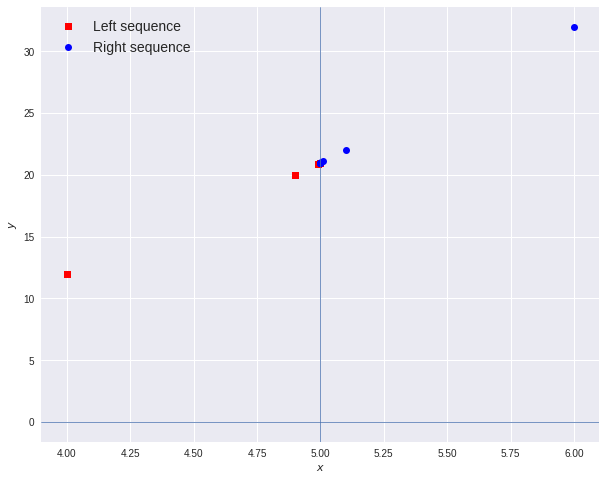

In [105]:
plt.figure(figsize=(10,8))
plt.plot(L5,f(L5),'rs',label='Left sequence')
plt.plot(R5,f(R5),'bo',label='Right sequence')

plt.axhline(y=0,lw=0.75)
plt.axvline(x=5,lw=0.75)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize=14)

* As we can see, both sequnces of dot __converg__ on the $y$-value $21$ as the $x$-value approaces $5$.

* In this case we __estimate__
$$
\lim_{x\to 5}(x^2-4) = 21.
$$

* Note that each part of the piecewise function and its domain are contained within their own set of brackets within the __Piecewise()__ function. 

# __Exercise 1.1__

1. Use the example above to estimate the limit
$$
\lim_{x\to 3} (x^5+3x^4-4x^2+2x+1)
$$
along sequnces approacing 3 from above and from below.

2. Plot the outputs of this function along these sequnces.


3. What values do the sequnces converge to?



# __Section 1.2__ Continuity

## One-sided limits \& Piecewise functions 

* A one sided limit is calculated along a sequnce of numbers from one side of a fixed number only.


* For example, the sequence of numbers below appraches $5$ from below (or from the left), which we write as $\lim_{x\to 5^{-}}$.

In [56]:
5-S(8)

array([4.        , 4.9       , 4.99      , 4.999     , 4.9999    ,
       4.99999   , 4.999999  , 4.9999999 , 4.99999999])

* Similarly, the sequnce of numbers below aproaces $5$ from above (or from the right), which we write as $\lim_{x\to5^+}$.

* These seucences can be used to calculate the __left hand limit__ and the __right hand limit__ of a function about $5$, like we did in the first example.

* If these limits mathch, then we say the limit at 5 exists.

* Not every function will have a limit at all values of $x$

* In the cell below we define a __piecewise__ function called __P(x)__ to represent
$$
P(x) = 
\begin{cases}
x^2+34, \quad \text{if  } x< 2 \\
x^2+2x+15, \quad \text{if  } x\geq 2
\end{cases}
$$

In [58]:
def P(x):
  if x<2:
    return x**2+34
  if x>=2:
    return x**2+ 2*x+15

P=np.vectorize(P) 

## __IMPORTANT ! !__

* The command __P=np.vectorize(P)__ at the end of this cell is critical to make the original definition of __P__ work with __numpy.__

* Without including this extra command, you will get an error message telling you your function cannot be used with __numpy arrays__

* This is because the __if__ directive can usually be only applied to one number at a time, instead of a list of numbers. 


* The __np.vectorize()__ command modifies this so __if__ can be applied to a list of numbers.

## __Example 1.2__ 

1. Use __np.linspace()__ to create list with 501 value for $x\in$__[-1,5]__ and plot __P__ along this linspace.

In [60]:
x=np.linspace(-1,5,501)

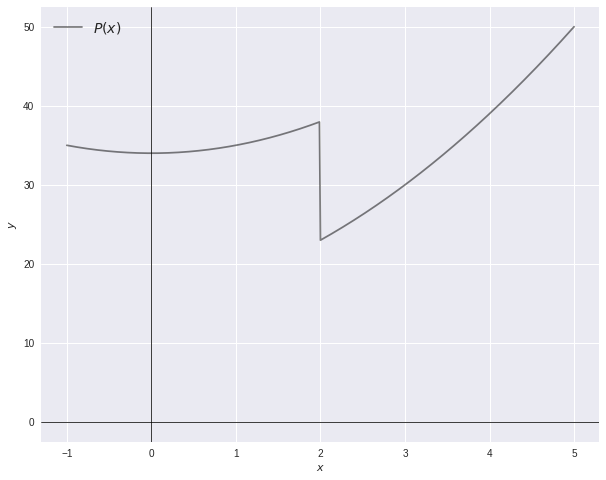

In [74]:
plt.figure(figsize=(10,8))
plt.plot(x,P(x),color='k', label='$P(x)$',alpha=0.5)

plt.axhline(y=0,lw=0.75,color='k')
plt.axvline(x=0,lw=0.75,color='k')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize=14)

* As we can see, there is a sudden jump in the value of the function at $x=2$, i.e. where the function changes from one form to another.

2. Use the __S(N)__ function to define a seqeunce approaching 2 from below and another sequence approaching 2 from above. 

In [75]:
L2=2-S(8)
L2

array([1.        , 1.9       , 1.99      , 1.999     , 1.9999    ,
       1.99999   , 1.999999  , 1.9999999 , 1.99999999])

In [76]:
R2=2+S(8)
R2

array([3.        , 2.1       , 2.01      , 2.001     , 2.0001    ,
       2.00001   , 2.000001  , 2.0000001 , 2.00000001])

3. Now estimate the limits
$$
\lim_{x\to2^-}P(x) \quad\text{and}\quad \lim_{x\to2^+}P(x).
$$


In [77]:
P(L2)

array([35.        , 37.61      , 37.9601    , 37.996001  , 37.99960001,
       37.99996   , 37.999996  , 37.9999996 , 37.99999996])

* From this sequnce outputs we estimate
$$
\lim_{x\to2^-}P(x) = 38.
$$

In [78]:
P(R2)

array([30.        , 23.61      , 23.0601    , 23.006001  , 23.00060001,
       23.00006   , 23.000006  , 23.0000006 , 23.00000006])

* From this sequnce we estimate 
$$
\lim_{x\to2^{+}} = 23
$$

* We see that 
$$
\lim_{x\to2^{-}}P(x) \neq \lim_{x\to2^+}P(x)
$$
and so we say $\displaystyle \lim_{x\to2}P(x)$ __does not exist !__

4. Copy \& Paste the plot from above and include these sequences in it

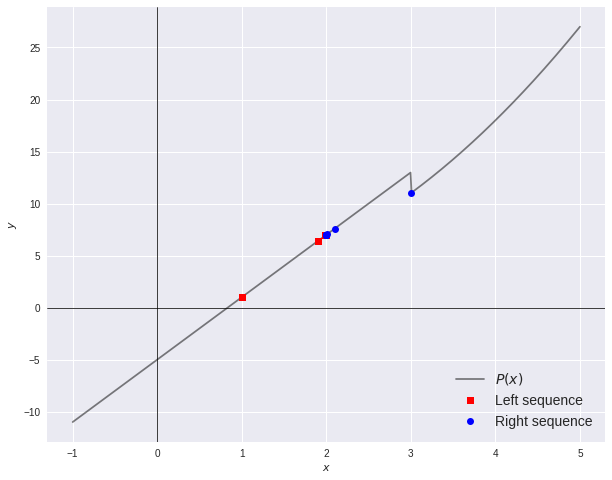

In [106]:
plt.figure(figsize=(10,8))
plt.plot(x,P(x),color='k', label='$P(x)$',alpha=0.5)

plt.plot(L2,P(L2),'rs',label='Left sequence')
plt.plot(R2,P(R2),'bo',label='Right sequence')

plt.axhline(y=0,lw=0.75,color='k')
plt.axvline(x=0,lw=0.75,color='k')

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(fontsize=14)

---
# __Exercise 1.2__

1. Define a python function to represent
$$
Q(x) =
\begin{cases}
 x^3 +4x^2-x+1, \quad \text{ if } x<1\\
 x^2 +7x + 4, \quad \text{ if } x\geq 1 
\end{cases}
$$

2. Plot this piecewise function along the interval $x\in$__[-2,4]__ with 501 points.

3. Create apropriate sequnces to estimate the limits
$$
\lim_{x\to1^-}Q(x)\quad \lim_{x\to1^+}Q(x).
$$
Does $\lim_{x\to1}Q(x)$ exist?

4. Copy \& Paste the plot from above and include these sequences in it

---
----

# __Section 2__  Symbolic Peicewise Functions

* In the __SymPy__ library there is a specific function calles __sym.Piecewise()__ used to create a sybmolic piecewise function>


* This is useful when we want to calculate the __derivatives__ of these piecewise functions



## __Example 2.1__

Given the piecewise function

$$
p(t)=
    \begin{cases}
    6t-5,\quad t<3, \\ 
    t^2+2,\quad t \geq 3 
    \end{cases}
$$   
answer the following:


1. Use __sym.Piecewise()___ to define __p(t)__ symbolically.

* Before we define __p(t)__ we must use __sym.symbols()__ to declare the symbol __t__

In [81]:
t=sym.symbols('t', real = True)
t

t

* Now we can define our symbolic piecewise function

In [86]:
p=sym.Piecewise((6*t-5,t<3),(t**2+2,t>=3))
p

Piecewise((6*t - 5, t < 3), (t**2 + 2, True))

2. Use __sym.lambdify()__ to create a __numpy__ compatible version of __p(t)__ and plot this along the interval __T=[0,6]__ with __1001 points__



In [87]:
P=sym.lambdify(t,p,'numpy')

In [90]:
T=np.linspace(0,6,1001)

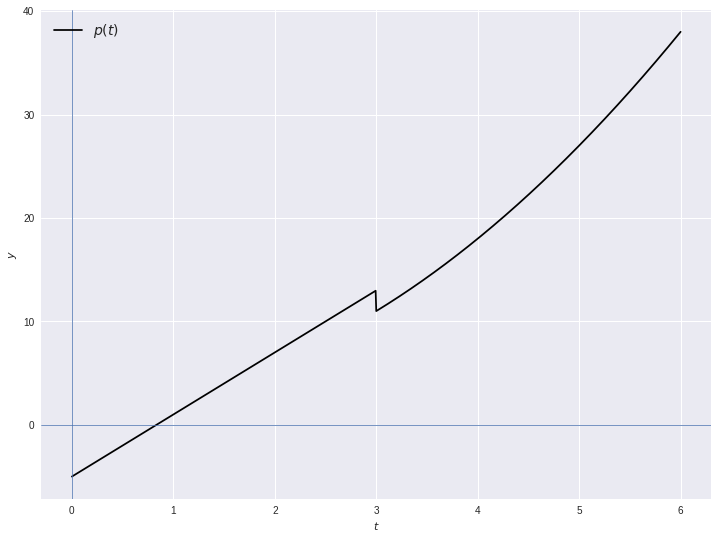

In [109]:
plt.figure(figsize=(12,9))
plt.plot(T,P(T),label='$p(t)$',c='k')

plt.axvline(x=0,lw=0.75)
plt.axhline(y=0,lw=0.75)

plt.xlabel('$t$')
plt.ylabel('$y$')

plt.legend(loc='upper left',fontsize=14)

4. Use __sym.diff()__ to calculate the derivative $\frac{dp}{dt}$ symbolically, lambdify this derivative and plot it on the same graph.

In [99]:
dp = sym.diff(p,(t,1))
dp

Piecewise((6, t < 3), (2*t, True))

In [100]:
DP=sym.lambdify(t,dp,'numpy')

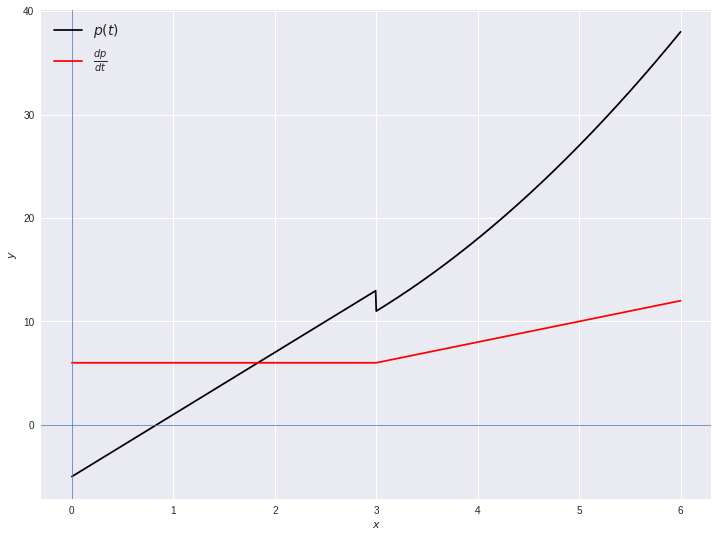

In [104]:
plt.figure(figsize=(12,9))
plt.plot(T,P(T),label='$p(t)$',c='k')
plt.plot(T,DP(T),label='$\\frac{dp}{dt}$',c='r')

plt.axvline(x=0,lw=0.75)
plt.axhline(y=0,lw=0.75)

plt.xlabel('$t$')
plt.ylabel('$y$')

plt.legend(loc='upper left',fontsize=14)

--- 

## __Exercise 2.1__

Given the piecewise function

$$
q(s)=
\begin{cases}
    s^2+1, s<0\\
    2- s^2,s\geq 0
\end{cases}   
$$
answer the following:


1. Define a symbolic __s__ and use it with __sym.Piecewise()__ to define __q(s)__

 

2. Use __sym.lambdify()__ create __Q()__ the numpy compatible version of __q(s)__

3.  Use __np.linspace()__ to define the intervale __S=[-2,2]__ with __1001__ points, and plot __Q()__ along this interval.

4. Use __sym.diff()__ to find $\frac{dq}{ds}$ and create a __lambdified__ version called __DQ__

5. Copy and pase the plot from __Part 3__ into to cell below and include the plot of $\frac{dq}{ds}$.

---
---
# __Section 3__ Testing for continuty and smoothness

* Now that we know how to define a piecewise function and calculate its derivative symbolically, we can use __sym.lambdify()__ to calculate these functions along sequences like in __Section 1__


* We can use these sequcences to test if a function is __Continuous & Smooth__


### __Definition 1__ Continuous Functions

* A function $f(x)$ is continuous at $x=a$ if the following conditions are true
  1. $\displaystyle \lim_{x\to a^{-}}f(x) = \lim_{x\to a^{+}} f(x)$, in other words $\displaystyle \lim_{x\to a}f(x)$ exists.

  2. $\displaystyle \lim_{x\to a}f(x) = f(a)$, this means the limit at $x=a$ and the actual function value at $x=a$ are the same number.

* When both of these conditions are true, then there will be no sudden jump in the value of $f$ at $x=a$, and the __graph__ will appear as one __continuous line__ 

### __Definition 2__ Smooth Functions

* A function $f(x)$ is smooth at $x=a$ if $f(x)$ is continuous at $x=a$ __AND__  the following conditions are true
  1. $\displaystyle \lim_{x\to a^{-}}\frac{df}{dx} = \lim_{x\to a^{+}} \frac{df}{dx}$, in other words $\displaystyle \lim_{x\to a}\frac{df}{dx}$ exists.

  2. $\displaystyle \lim_{x\to a}\frac{df}{dx} = \frac{df}{dx}(a)$, this means the limit at $x=a$ and the actual function value at $x=a$ are the same number.

* This means the __derivative__ $\displaystyle \frac{df}{dx}$ is __continuos__, and the __graph__  $\displaystyle \frac{df}{dx}$ of will appear as one __continuous line__ at $x=a$.

* It also means the graph of $f(x)$ will not appear to increase or decrease more rapidly at $x=a$.

---

## __Example 3.1__

* We already ploted the graph of 
$$
p(t)=
   \begin{cases}
    6t-5,\quad\text{if }t<3 \\
    t^2+3, \quad\text{if }t\geq 3
  \end{cases}
$$
in __Exercise 2.1__


* The graph is shown below again:

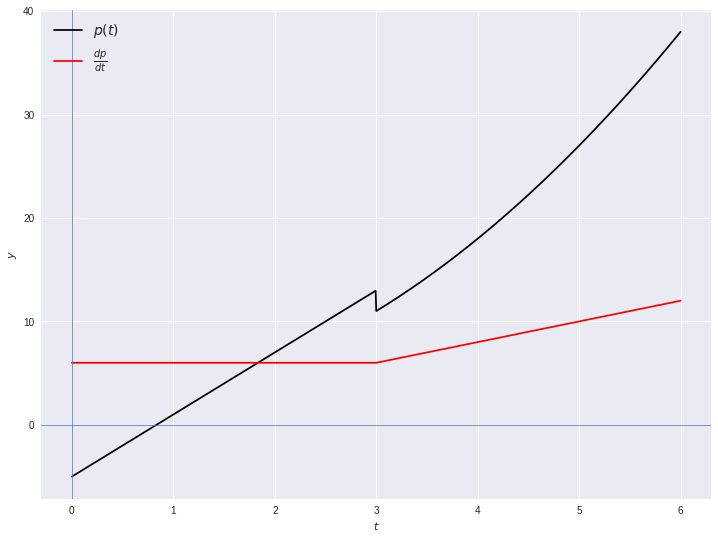

In [108]:
plt.figure(figsize=(12,9))
plt.plot(T,P(T),label='$p(t)$',c='k')
plt.plot(T,DP(T),label='$\\frac{dp}{dt}$',c='r')

plt.axvline(x=0,lw=0.75)
plt.axhline(y=0,lw=0.75)

plt.xlabel('$t$')
plt.ylabel('$y$')

plt.legend(loc='upper left',fontsize=14)

* From this graph we see the following:
  1. $p(t)$ is not continus at $t=3$

  2. $\frac{dp}{dt}$ is continuous at $t=3$ and so $p(t)$ is __smooth__ at $t=3$

1. Use the __lambdified__ versions of $p(t)$  to show $p(t)$ is not continuous at $t=3$

* First we create a left and right sequence about $t=3$ to estimate the left and right hand limits  $\displaystyle \lim_{t\to3^{-}}p(t)$ and $\displaystyle \lim_{t\to3^{+}}p(t)$

In [110]:
L3=3-S(8)
R3=3+S(8)

In [111]:
L3

array([2.        , 2.9       , 2.99      , 2.999     , 2.9999    ,
       2.99999   , 2.999999  , 2.9999999 , 2.99999999])

In [113]:
R3

array([4.        , 3.1       , 3.01      , 3.001     , 3.0001    ,
       3.00001   , 3.000001  , 3.0000001 , 3.00000001])

* Now we evaluate the __lambdified__ version of $p$ along these sequences:

In [114]:
P(L3)

array([ 7.        , 12.4       , 12.94      , 12.994     , 12.9994    ,
       12.99994   , 12.999994  , 12.9999994 , 12.99999994])

In [115]:
P(R3)

array([18.        , 11.61      , 11.0601    , 11.006001  , 11.00060001,
       11.00006   , 11.000006  , 11.0000006 , 11.00000006])

* From these sequences we estimate:
$$
\lim_{t\to3^{-}}p(t) = 13
$$
and 
$$
\lim_{t\to3^{+}}p(t) = 11
$$
so we see 
$$
\lim_{t\to3^{-}}p(t) \neq \lim_{t\to3^{+}}p(t).
$$


* Now we already know the function is not continuous at $t=3$, since $\displaystyle\lim_{t\to 3}p(t)$ does not exist.


* Just for the sake of it, we will also calucalute $p(3)$, which is simply 


In [116]:
P(3)

array(11.)

* So __p(t)__ is not continuous at $t=3$.

2. Use the __lambdified__ version of $\frac{dp}{dt}$ to show the derivaive is continuous at $t=3$

In [117]:
DP(L3)

array([6., 6., 6., 6., 6., 6., 6., 6., 6.])

In [118]:
DP(R3)

array([8.        , 6.2       , 6.02      , 6.002     , 6.0002    ,
       6.00002   , 6.000002  , 6.0000002 , 6.00000002])

* From these sequnces we see that 
$$
\lim_{t\to3^{-}}\frac{dp}{dt} = \lim_{t\to3^{+}}\frac{dp}{dt} = 6
$$

* We also have 

In [119]:
DP(3)

array(6.)

* This means $\frac{dp}{dt}$ is continous at $t=3$, as you can see from the red line in the graph aboe. 


* However, this is not enough to make $f(t)$ smooth, since this function is not continuous at $t=3$, and so not all conditions are met for smoothness. 

## __Exercise 3.1__

1. Carry out the steps in __Example 3.1__ to show that the function
$$
w(t)=
  \begin{cases}
    t^2 - 5t +1 \quad \text{if } x<2 \\
    2t^2 - 9t + 5 \quad \text{if } x\geq 2 \\
  \end{cases}
$$
is continuus and smooth at $t=2$




2. Plot the functions  $w(t)$ and $\frac{dw}{dt}$ along the interval __T=[-3,5]__ with __1001__ points.